In [3]:
%matplotlib notebook
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

In [4]:
n_colors = 32
pic = 'https://www.dropbox.com/s/bmwwfct2qxjfje4/sutd.png?dl=1'
img = mpimg.imread(pic)
img = img[:,:,:3]

In [15]:
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))
# print(image_array)
# print(type(image_array))

In [6]:
def recreate_image(palette, labels, w, h):
    d = palette.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = palette[labels[label_idx]]
            label_idx += 1
    return image

In [13]:
# Question 2  (a)

In [30]:
my_sample = image_array[np.random.randint(image_array.shape[0], size=1000), :]
# print(my_sample.shape)
kmeanmodel = KMeans(n_clusters=32).fit(my_sample)
# print(kmeanmodel)
kmeans_palette = kmeanmodel.cluster_centers_
kmeans_labels = kmeanmodel.predict(image_array)
# print(kmeans_palette.shape)
# print(kmeans_labels.shape)

In [ ]:
# Question 2  (b)

In [33]:
random_palette = image_array[np.random.randint(image_array.shape[0], size=32), :]
random_labels = pairwise_distances_argmin(image_array, random_palette)
# print(random_labels.shape)

<IPython.core.display.Javascript object>


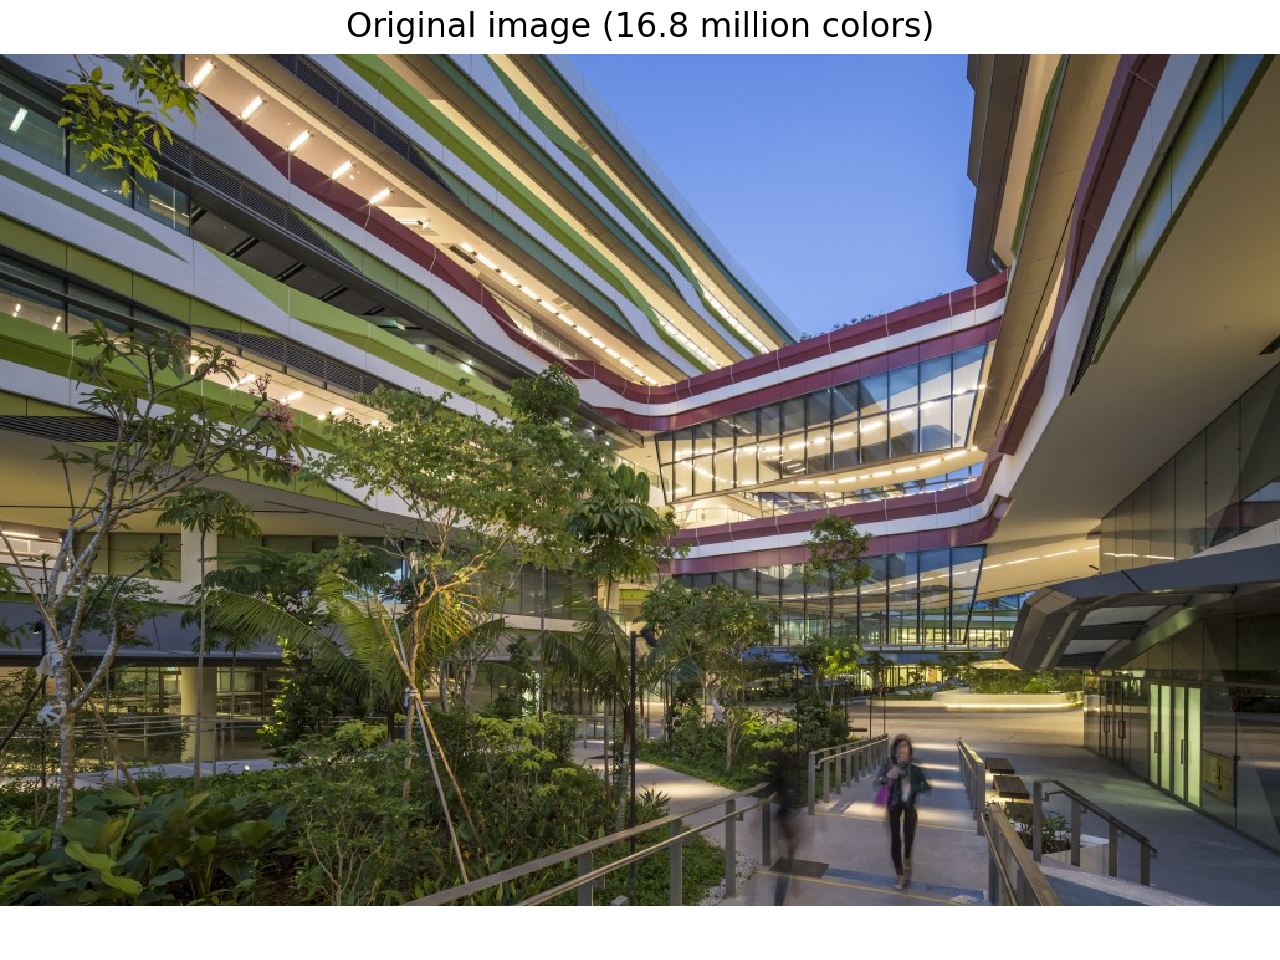

<IPython.core.display.Javascript object>


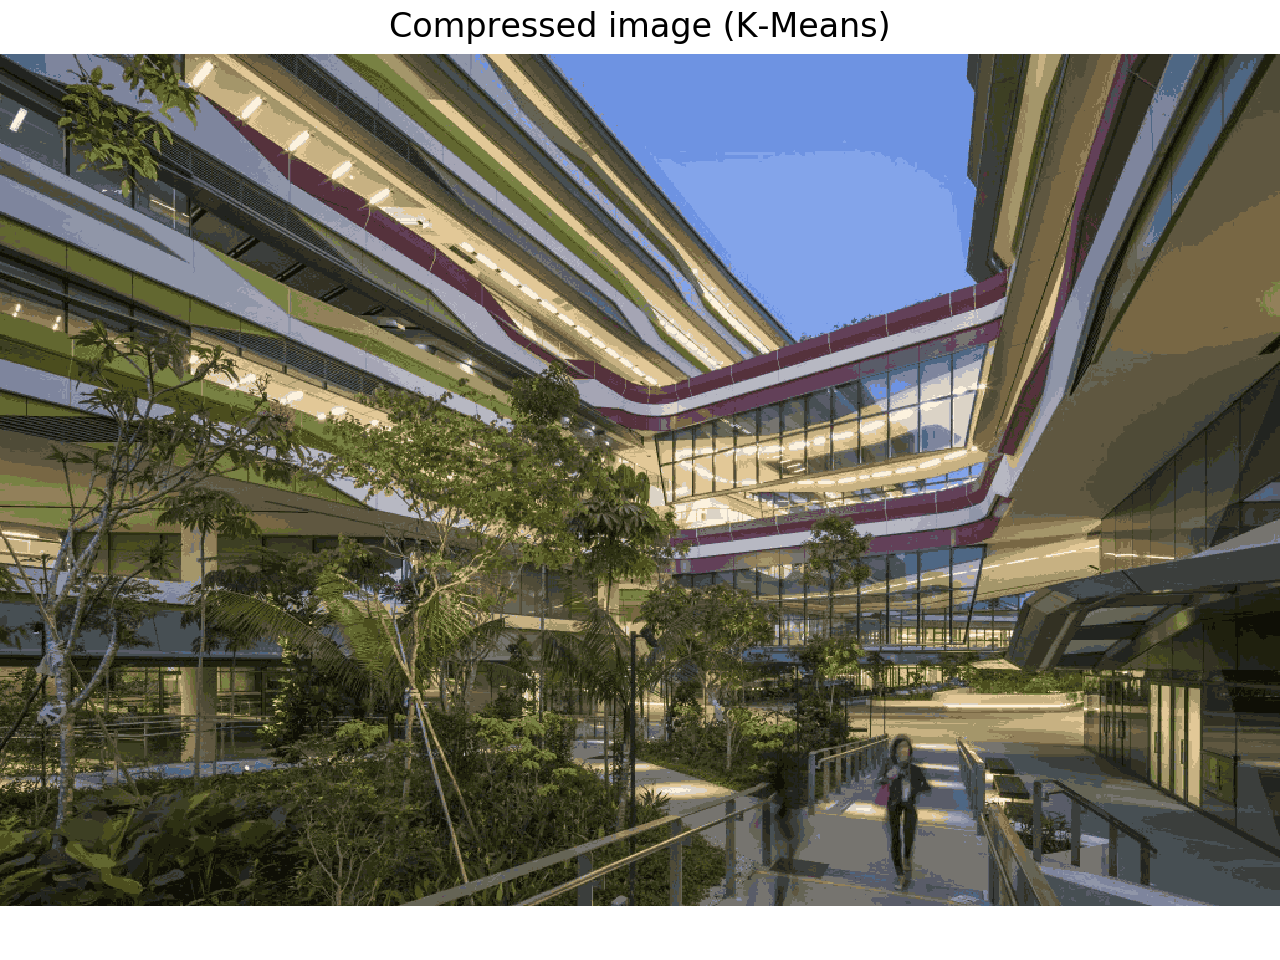

<IPython.core.display.Javascript object>


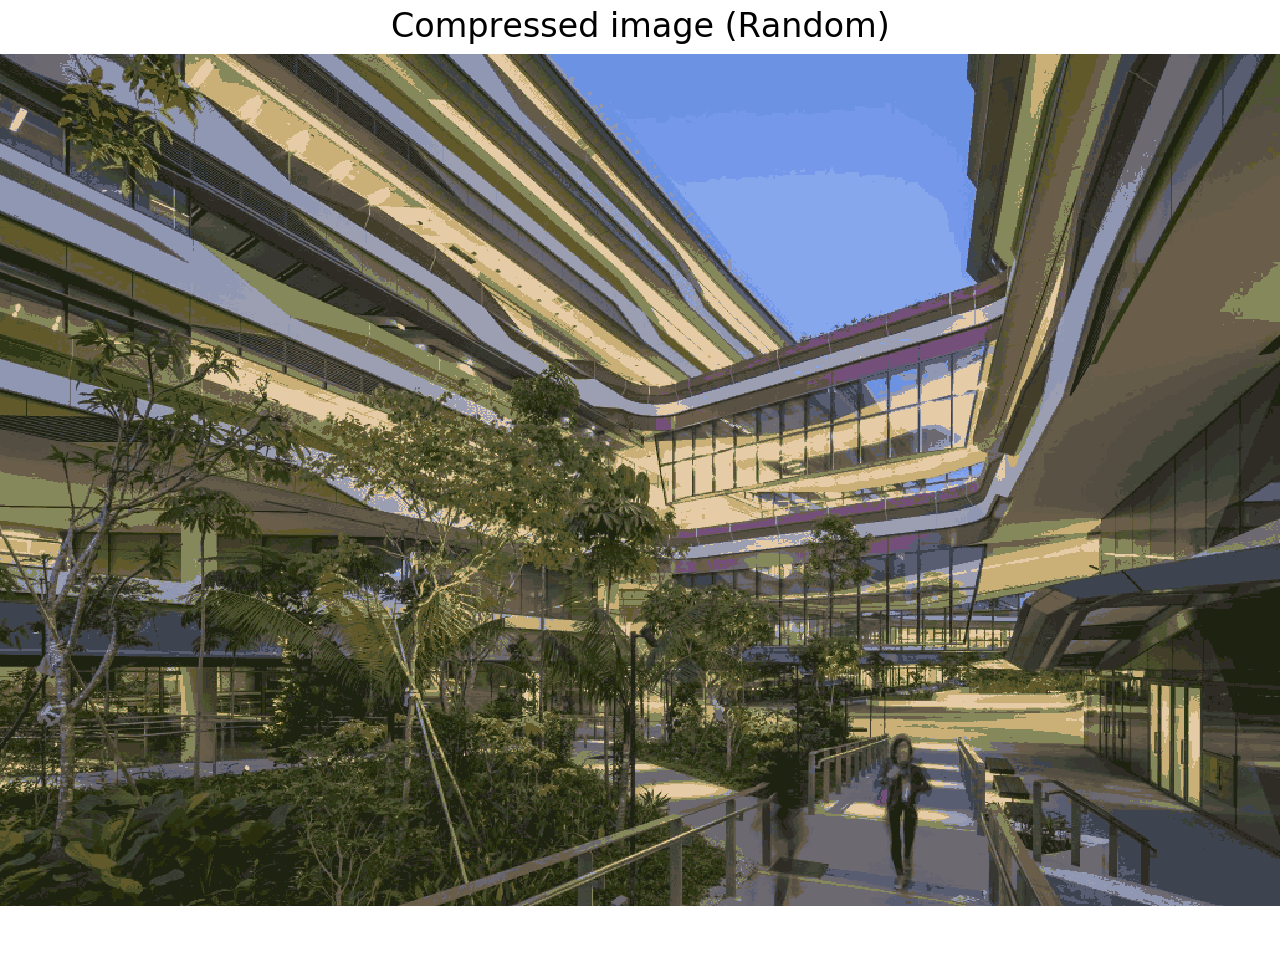

In [34]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (16.8 million colors)')
plt.imshow(img)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (K-Means)')
plt.imshow(recreate_image(kmeans_palette, kmeans_labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (Random)')
plt.imshow(recreate_image(random_palette, random_labels, w, h))
plt.show()